In [1]:
# Importando as bibliotecas que serão usadas na análise.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
plt.style.use('fivethirtyeight') # definindo o estilo do gráfico
%matplotlib inline

# Clusterização
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # cross_validation
from sklearn.neighbors import KNeighborsClassifier # K-vizinhos
from sklearn.metrics import classification_report,confusion_matrix # validar o modelo
from sklearn import preprocessing 
from copy import deepcopy

import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Lendo os dados do csv vendas_produtos.
geolocation = pd.read_csv('/content/drive/My Drive/Colab Notebooks/olist/olist_geolocation_dataset.csv',sep=',',quotechar='"', encoding='utf8',error_bad_lines=False,dtype={'geolocation_zip_code_prefix': str})
customers = pd.read_csv('/content/drive/My Drive/Colab Notebooks/olist/olist_customers_dataset.csv',sep=',',quotechar='"', encoding='utf8',error_bad_lines=False, dtype={'customer_zip_code_prefix': str})
order_items = pd.read_csv('/content/drive/My Drive/Colab Notebooks/olist/olist_order_items_dataset.csv',sep=',',quotechar='"', encoding='utf8',error_bad_lines=False)
order_pay = pd.read_csv('/content/drive/My Drive/Colab Notebooks/olist/olist_order_payments_dataset.csv',sep=',',quotechar='"', encoding='utf8',error_bad_lines=False)
order_reviews = pd.read_csv('/content/drive/My Drive/Colab Notebooks/olist/olist_order_reviews_dataset.csv',sep=',',quotechar='"', encoding='utf8',error_bad_lines=False)
order_status = pd.read_csv('/content/drive/My Drive/Colab Notebooks/olist/olist_orders_dataset.csv',sep=',',quotechar='"', encoding='utf8',error_bad_lines=False)
products = pd.read_csv('/content/drive/My Drive/Colab Notebooks/olist/olist_products_dataset.csv',sep=',',quotechar='"', encoding='utf8',error_bad_lines=False)
sellers = pd.read_csv('/content/drive/My Drive/Colab Notebooks/olist/olist_sellers_dataset.csv',sep=',',quotechar='"', encoding='utf8',error_bad_lines=False,dtype={'seller_zip_code_prefix': str})
products_translation = pd.read_csv('/content/drive/My Drive/Colab Notebooks/olist/product_category_name_translation.csv',sep=',',quotechar='"', encoding='utf8',error_bad_lines=False)

_______________________

## Análise Exploratória do Dataset
____

#### Tamanho do Dataset

In [0]:
# Quantas linhas e colunas tem nos Datasets
print('\n Número de Linhas e Colunas:')
print('\n Geolocation:')
print(geolocation.shape)
#
print('\n Customers:')
print(customers.shape)
#
print('\n Order Items:')
print(order_items.shape)
#
print('\n Order Payments:')
print(order_pay.shape)
#
print('\n Order Reviews:')
print(order_reviews.shape)
#
print('\n Order Status:')
print(order_status.shape)
#
print('\n Products:')
print(products.shape)
#
print('\n Sellers:')
print(sellers.shape)
#
print('\n Products Translation:')
print(products_translation.shape)


 Número de Linhas e Colunas:

 Geolocation:
(1000163, 5)

 Customers:
(99441, 5)

 Order Items:
(112650, 7)

 Order Payments:
(103886, 5)

 Order Reviews:
(100000, 7)

 Order Status:
(99441, 8)

 Products:
(32951, 9)

 Sellers:
(3095, 4)

 Products Translation:
(71, 2)


_______________________

#### Tipo de dados

In [0]:
# Verificando como o Pandas está tratando as colunas.
print('\n Data Types:')
print('\n Geolocation:')
print(geolocation.dtypes)
#
print('\n Customers:')
print(customers.dtypes)
#
print('\n Order Items:')
print(order_items.dtypes)
#
print('\n Order Payments:')
print(order_pay.dtypes)
#
print('\n Order Reviews:')
print(order_reviews.dtypes)
#
print('\n Order Status:')
print(order_status.dtypes)
#
print('\n Products:')
print(products.dtypes)
#
print('\n Sellers:')
print(sellers.dtypes)
#
print('\n Products Translation:')
print(products_translation.dtypes)


 Data Types:

 Geolocation:
geolocation_zip_code_prefix     object
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

 Customers:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix    object
customer_city               object
customer_state              object
dtype: object

 Order Items:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

 Order Payments:
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

 Order Reviews:
review_id                  object
order_id                   object
review_score                int64
rev

_______________________

#### Visualizando os dados de cada Dataset.

In [0]:
# Mostrar as primeiras linhas do DataFrame. 
print('\n Dataframe:')
print('\n Geolocation:')
geolocation.head()


 Dataframe:

 Geolocation:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
2,01046,-23.546129,-46.642951,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP


In [0]:
print('\n Customers:')
customers.head()


 Customers:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [0]:
print('\n Order Items:')
order_items.head()


 Order Items:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [0]:
print('\n Order Payments:')
order_pay.head()


 Order Payments:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [0]:
print('\n Order Reviews:')
order_reviews.head()


 Order Reviews:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [0]:
print('\n Order Status:')
order_status.head()


 Order Status:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [0]:
print('\n Products:')
products.head()


 Products:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [0]:
print('\n Sellers:')
sellers.head()


 Sellers:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [0]:
print('\n Products Translation:')
products_translation.head()


 Products Translation:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


_______________________

#### Estrutura dos dados Olist

![](https://i.imgur.com/HRhd2Y0.png)

________

## Estruturando os dados para o Estudo de Caso. 

Como o dataset está dividido em diversos arquivos e as informações estão dispersas. 

Foi necessário pensar na estrutura ideal para nossa análise e construir uma única base a ser usada para realizar as análises de Clusterização e Geoespacial.

____

####  Selecionando e Agrupando as colunas em apenas um arquivo.

#### **Primeira Etapa:**
##### JOIN's com entre as tabelas **ORDER_STATUS** com **ORDER_ITEMS** 

In [4]:
print('Order_Status_Filter')
order_status_filter = order_status[["customer_id","order_id"]]
order_status_filter.head()

Order_Status_Filter


,customer_id,order_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159


In [0]:
len(order_status_filter)

99441

In [5]:
print('Order_Items_Filter')
order_items_filter = order_items[['order_id','product_id','price','freight_value','seller_id']]
order_items_filter.head()

Order_Items_Filter


,order_id,product_id,price,freight_value,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,df560393f3a51e74553ab94004ba5c87


In [0]:
len(order_items_filter)

112650

##### **Resultado do JOIN_1**

In [6]:
print('JOIN_1: Order_Status_Filter com Order_Items_Filter')
join1 = order_items_filter.join(order_status_filter.set_index('order_id'), on= 'order_id')
join1.head()

JOIN_1: Order_Status_Filter com Order_Items_Filter


,order_id,product_id,price,freight_value,seller_id,customer_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795


In [0]:
len(join1)

112650

_____

#### **Segunda Etapa:**
##### JOIN com a tabela **PRODUCT e SELLERS**

In [7]:
print('Products_Filter')
products_filter = products[['product_id','product_category_name']]
products_filter.head()

Products_Filter


,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


##### **Resultado do JOIN_2 com Product**

In [8]:
print('JOIN_2: JOIN_1 com Products_Filter')
join2 = join1.join(products_filter.set_index('product_id'), on= 'product_id')
join2.head()

JOIN_2: JOIN_1 com Products_Filter


,order_id,product_id,price,freight_value,seller_id,customer_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,ferramentas_jardim


In [9]:
len(join2)

112650

##### **Resultado do JOIN_3 com SELLERS**

In [10]:
print('JOIN_3: JOIN_2 com o SELLER')
join3 = join2.join(sellers.set_index('seller_id'), on= 'seller_id')
join3.head()

JOIN_3: JOIN_2 com o SELLER


,order_id,product_id,price,freight_value,seller_id,customer_id,product_category_name,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,pet_shop,03471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,moveis_decoracao,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,perfumaria,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,ferramentas_jardim,87900,loanda,PR


In [0]:
len(join3)

112650

_____

#### **Terceita Etapa:**
##### JOIN com a tabela **CUSTOMERS**

In [11]:
print('JOIN_4: JOIN_3 com o CUSTOMERS')
join4 = join3.join(customers.set_index('customer_id'), on= 'customer_id')
join4.head()

JOIN_4: JOIN_3 com o CUSTOMERS


,order_id,product_id,price,freight_value,seller_id,customer_id,product_category_name,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,cool_stuff,27277,volta redonda,SP,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,pet_shop,03471,sao paulo,SP,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,moveis_decoracao,37564,borda da mata,MG,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,perfumaria,14403,franca,SP,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,ferramentas_jardim,87900,loanda,PR,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [0]:
len(join4)

112650

#### **Etapa Final:**
##### Criando a coluna **payment_total** que é a soma do preço do produto com o valor do frete.

In [12]:
join4['payment_total'] = join4['price']+ join4['freight_value']
join4.head()

,order_id,product_id,price,freight_value,seller_id,customer_id,product_category_name,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_total
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,cool_stuff,27277,volta redonda,SP,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,pet_shop,03471,sao paulo,SP,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,moveis_decoracao,37564,borda da mata,MG,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,perfumaria,14403,franca,SP,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,ferramentas_jardim,87900,loanda,PR,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,218.04


In [0]:
len(join4)

112650

In [13]:
print('Arquivo final estruturado nomeado de Olist')
olist = join4[['customer_id','customer_unique_id','customer_zip_code_prefix','customer_city','customer_state', 'order_id','product_id','product_category_name',
               'price','freight_value','payment_total','seller_id','seller_zip_code_prefix','seller_city','seller_state']]
olist.head()

Arquivo final estruturado nomeado de Olist


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,product_id,product_category_name,price,freight_value,payment_total,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,13.29,72.19,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.90,19.93,259.83,dd7ddc04e1b6c2c614352b383efe2d36,03471,sao paulo,SP
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,199.00,17.87,216.87,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumaria,12.99,12.79,25.78,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,199.90,18.14,218.04,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR


In [0]:
len(olist)

112650

#### Tratamento dos campos nulos.

In [15]:
#Verificando os campos nulos.
olist.isnull().sum()

customer_id                    0
customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
order_id                       0
product_id                     0
product_category_name       1603
price                          0
freight_value                  0
payment_total                  0
seller_id                      0
seller_zip_code_prefix         0
seller_city                    0
seller_state                   0
dtype: int64

In [0]:
# excluindo os campos nulos
olist.dropna(inplace= True)

In [0]:
# Verificando se foram excluídos
len(olist)

111047

In [17]:
# Filtrando os estados do Sudeste
olist_cp = olist.copy()
olist_sudeste = olist_cp[olist_cp['customer_state'].isin(['SP','RJ','MG','ES'])]
olist_sudeste.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,product_id,product_category_name,price,freight_value,payment_total,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,13.29,72.19,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.90,19.93,259.83,dd7ddc04e1b6c2c614352b383efe2d36,03471,sao paulo,SP
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,199.00,17.87,216.87,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumaria,12.99,12.79,25.78,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,199.90,18.14,218.04,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR


In [0]:
len(olist_sudeste)

76335

In [0]:
# verificando se o tamanho representa os 69% do sudeste
percent_sudeste = len(olist_sudeste)/len(olist)
print('Percentual do Sudeste:', percent_sudeste)

Percentual do Sudeste: 0.6874116365142687


#### Exportação do arquivo Olist final em CSV

In [0]:
# olist_sudeste.to_csv ('./brazilian-ecommerce/_olist_sudeste.csv', index = False, header=True)

____

### Incluindo a parte de Reviews na tabela para o trabalho do Mira. 

_____

In [0]:
print('Order_Reviews_Filter')
order_reviews_filter = order_reviews[['review_score','order_id','review_comment_title','review_comment_message']]
order_reviews_filter.head()

Order_Reviews_Filter


,review_score,order_id,review_comment_title,review_comment_message
0,4,73fc7af87114b39712e6da79b0a377eb,NaN,NaN
1,5,a548910a1c6147796b98fdf73dbeba33,NaN,NaN
2,5,f9e4b658b201a9f2ecdecbb34bed034b,NaN,NaN
3,5,658677c97b385a9be170737859d3511b,NaN,Recebi bem antes do prazo estipulado.
4,5,8e6bfb81e283fa7e4f11123a3fb894f1,NaN,Parabéns lojas lannister adorei comprar pela I...


In [0]:
print('Olist_Reviews')
olist_reviews = olist_sudeste.join(order_reviews_filter.set_index('order_id'), on = 'order_id')
olist_reviews.head()

Olist_Reviews


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,product_id,product_category_name,price,freight_value,payment_total,seller_id,seller_zip_code_prefix,seller_city,seller_state,review_score,review_comment_title,review_comment_message
0,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,13.29,72.19,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,5,NaN,"Perfeito, produto entregue antes do combinado."
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.90,19.93,259.83,dd7ddc04e1b6c2c614352b383efe2d36,03471,sao paulo,SP,4,NaN,NaN
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,199.00,17.87,216.87,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,5,NaN,Chegou antes do prazo previsto e o produto sur...
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumaria,12.99,12.79,25.78,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP,4,NaN,NaN
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,199.90,18.14,218.04,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,5,NaN,Gostei pois veio no prazo determinado .


#### Exportação do arquivo final em CSV

In [0]:
#olist_reviews.to_csv ('./brazilian-ecommerce/_olist_reviews_sudeste.csv', index = False, header=True)

_____

### Exportando o arquivo para **Geocodificar**

In [19]:
# Selecionando as colunas necessárias para o arquivo geo
geo = olist_sudeste.copy()
geo = geo[['customer_unique_id','customer_city','customer_state','payment_total','customer_zip_code_prefix','product_category_name']]
geo.head()

,customer_unique_id,customer_city,customer_state,payment_total,customer_zip_code_prefix,product_category_name
0,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,72.19,28013,cool_stuff
1,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,259.83,15775,pet_shop
2,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,216.87,35661,moveis_decoracao
3,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25.78,12952,perfumaria
4,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,218.04,13226,ferramentas_jardim


#### Acrescentando o formato para o Google Earth

In [0]:
# Criando a coluna personalizada para que o google earth entenda. 
geo['cep_brazil'] = 'CEP'+ geo['customer_zip_code_prefix'] + '-Brazil' 
geo.head()

,customer_unique_id,customer_city,customer_state,payment_total,customer_zip_code_prefix,product_category_name,cep_brazil
0,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,72.19,28013,cool_stuff,CEP28013-Brazil
1,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,259.83,15775,pet_shop,CEP15775-Brazil
2,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,216.87,35661,moveis_decoracao,CEP35661-Brazil
3,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25.78,12952,perfumaria,CEP12952-Brazil
4,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,218.04,13226,ferramentas_jardim,CEP13226-Brazil


In [0]:
# Retirando a coluna do zip_code_prefix
geo1 = geo.drop(['customer_zip_code_prefix'], axis =1)
geo1.head()              

,customer_unique_id,customer_city,customer_state,payment_total,product_category_name,cep_brazil
0,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,72.19,cool_stuff,CEP28013-Brazil
1,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,259.83,pet_shop,CEP15775-Brazil
2,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,216.87,moveis_decoracao,CEP35661-Brazil
3,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,25.78,perfumaria,CEP12952-Brazil
4,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,218.04,ferramentas_jardim,CEP13226-Brazil


In [0]:
#Verificando se manteve o mesmo tamanho
print('olist_sudeste: ',len(olist_sudeste))
print('olist_geo: ',len(geo1))

olist_sudeste:  76335
olist_geo:  76335


#### Exportação 01 arquivo único em CSV

In [0]:
#geo1.to_csv ('./brazilian-ecommerce/_olist_geo.csv', index = False, header=True)

#### Exportação dos arquivos em CSV de acordo com o tamanho limite do Google de 2.500 linhas

In [0]:
# exportando os arquivos em Geo o número máximo de linhas de 2.500 que o tamanho que o Google Earht suporta para gecodificar
#for i, dfi in enumerate(np.array_split(geo1, (len(geo1)/2500)+1)):
    #dfi.to_csv ('./brazilian-ecommerce/_olist_geo_{}.txt'.format(i), index = False, header=True)

### Incluindo as **latitude e longitude** existente no Dataframe para a região Sudeste.

In [20]:
#Verificando se manteve o mesmo tamanho
print('olist_sudeste: ',len(olist_sudeste))
print('olist_geo: ',len(geo))

olist_sudeste:  76335
olist_geo:  76335


In [21]:
# Retirando a coluna de customer_zip_code_prefix
geo_cod = geo.copy()
geo_cod = geo_cod.drop(['cep_brazil'], axis =1)
geo_cod.head()

KeyError: ignored

In [0]:
# Veriicando a tabela de lat/long
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
2,01046,-23.546129,-46.642951,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP


In [0]:
# gerando CEP únicos para a tabela de geolocation
unique_geolocation = geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'])

In [0]:
# Incluindo as lat/long na tabela de Geo para todos os CEP que encontrar. 
# Caso queira retornar os valores não encontrados tem que colocar o parâmetro, do contrário ele irá excluir no merge.

olist_sudeste_geocod = geo_cod.merge(unique_geolocation[['geolocation_zip_code_prefix','geolocation_lat','geolocation_lng']],
                                     left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

In [0]:
olist_sudeste_geocod.head()

,customer_unique_id,customer_city,customer_state,payment_total,customer_zip_code_prefix,product_category_name,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,72.19,28013,cool_stuff,28013,-21.758076,-41.312633
1,1256191557354bf29497a6f8ea3be86d,campos dos goytacazes,RJ,164.98,28013,beleza_saude,28013,-21.758076,-41.312633
2,e19295fe39010feeca6ef77ac61275d9,campos dos goytacazes,RJ,36.69,28013,eletronicos,28013,-21.758076,-41.312633
3,2583866968d72b2503e08837f6698689,campos dos goytacazes,RJ,146.17,28013,malas_acessorios,28013,-21.758076,-41.312633
4,ca50300f552f1bc9b5aa898a29382d69,campos dos goytacazes,RJ,48.13,28013,beleza_saude,28013,-21.758076,-41.312633


In [0]:
# Cep não encontrados na base para geocodificar que foram perdidos
len(geo_cod) - len(olist_sudeste_geocod)

45

In [0]:
# exportar aquivo
#olist_sudeste_geocod.to_csv ('./brazilian-ecommerce/_olist_sudeste_geocod_v2.csv', index = False, header=True)

_____

## Dataset Estruturado para o Sudeste: OLIST
____

#### Tipos de formato dos dados

In [0]:
print('Tipo dos Dados')
olist_sudeste.dtypes

Tipo dos Dados


customer_id                  object
customer_unique_id           object
customer_zip_code_prefix     object
customer_city                object
customer_state               object
order_id                     object
product_id                   object
product_category_name        object
price                       float64
freight_value               float64
payment_total               float64
seller_id                    object
seller_zip_code_prefix       object
seller_city                  object
seller_state                 object
dtype: object

#### Sumário estatístico

In [0]:
olist_sudeste.describe()

,price,freight_value,payment_total
count,76335.000000,76335.000000,76335.000000
mean,114.972807,17.407888,132.380695
std,173.470944,12.724368,179.203887
min,0.850000,0.000000,6.080000
25%,39.500000,11.850000,52.770000
50%,69.990000,15.100000,87.710000
75%,129.900000,18.450000,150.040000
max,6729.000000,339.590000,6922.210000


In [0]:
len(olist_sudeste)

76335

#### Verificando os campos nulos.

In [0]:
print('Olist - Campos Nulos')
olist_sudeste.isnull().sum()

Olist - Campos Nulos


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
order_id                    0
product_id                  0
product_category_name       0
price                       0
freight_value               0
payment_total               0
seller_id                   0
seller_zip_code_prefix      0
seller_city                 0
seller_state                0
dtype: int64

#### Validando a distribuição dos pedidos por Região do Brasil

In [0]:
print('Estados existentes no Dataset')
print( '-' * 70)
print(geolocation['geolocation_state'].unique())
print( '-' * 70)

Estados existentes no Dataset
----------------------------------------------------------------------
['SP' 'RN' 'AC' 'RJ' 'ES' 'MG' 'BA' 'SE' 'PE' 'AL' 'PB' 'CE' 'PI' 'MA'
 'PA' 'AP' 'AM' 'RR' 'DF' 'GO' 'RO' 'TO' 'MT' 'MS' 'RS' 'PR' 'SC']
----------------------------------------------------------------------


In [0]:
print('Divisão Territorial do Brasil')
print( '-' * 45)
print('Sudeste: SP, MG, RJ, ES')
print('Sul: PR, SC, RS')
print('Centro Oeste: DF, GO, MT, MS')
print('Norte: AC, AM, AP, PA, RO, RR, TO')
print('Nordeste: BA, PI, MA, CE, RN, PB, PE, AL, SE')
print( '-' * 45)

Divisão Territorial do Brasil
---------------------------------------------
Sudeste: SP, MG, RJ, ES
Sul: PR, SC, RS
Centro Oeste: DF, GO, MT, MS
Norte: AC, AM, AP, PA, RO, RR, TO
Nordeste: BA, PI, MA, CE, RN, PB, PE, AL, SE
---------------------------------------------


In [0]:
sudeste = ('SP', 'MG', 'RJ', 'ES')
sul = ('PR', 'SC', 'RS')
centro_oeste = ('DF', 'GO', 'MT', 'MS')
norte = ('AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO')
nordeste = ('BA', 'PI', 'MA', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE')

total_olist = len(olist)
percent_sudeste = round((len(olist[olist['customer_state'].isin(sudeste)])/ total_olist)* 100,2)
percent_sul = round((len(olist[olist['customer_state'].isin(sul)])/ total_olist)* 100,2)
percent_centro_oeste = round((len(olist[olist['customer_state'].isin(centro_oeste)])/ total_olist)* 100,2)
percent_norte = round((len(olist[olist['customer_state'].isin(norte)])/ total_olist)* 100,2)
percent_nordeste = round((len(olist[olist['customer_state'].isin(nordeste)])/ total_olist)* 100,2)
total_regiao = round((percent_sudeste + percent_sul + percent_centro_oeste + percent_norte  + percent_nordeste),1)

print( '-' * 45)
print('Distribuição dos pedidos por região do Brasil')
print( '-' * 45)
print('Sudeste: {}%'.format(percent_sudeste))
print('Sul: {}%'.format(percent_sul))
print('Centro Oeste: {}%'.format(percent_centro_oeste))
print('Norte: {}%'.format(percent_norte))
print('Nordeste: {}%'.format(percent_nordeste))
print( '-' * 45)
print('Total: {}%'.format(total_regiao) ,'-', 'Total Pedidos:',total_olist)
print( '-' * 45)


---------------------------------------------
Distribuição dos pedidos por região do Brasil
---------------------------------------------
Sudeste: 68.74%
Sul: 14.33%
Centro Oeste: 5.86%
Norte: 1.83%
Nordeste: 9.25%
---------------------------------------------
Total: 100.0% - Total Pedidos: 111047
---------------------------------------------


#### Visualização dos Dados

Contagem de vendas Brasil :


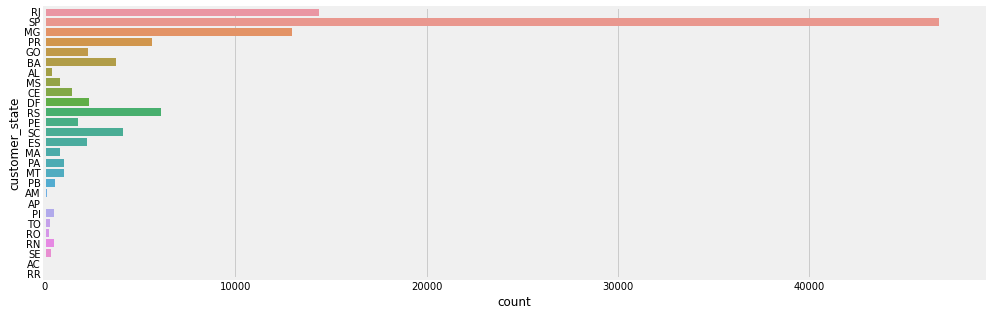

In [0]:
# Todo o Brasil
print('Contagem de vendas Brasil :')
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'customer_state' , data = olist)
plt.show()

Contagem de Vendas Sudeste:


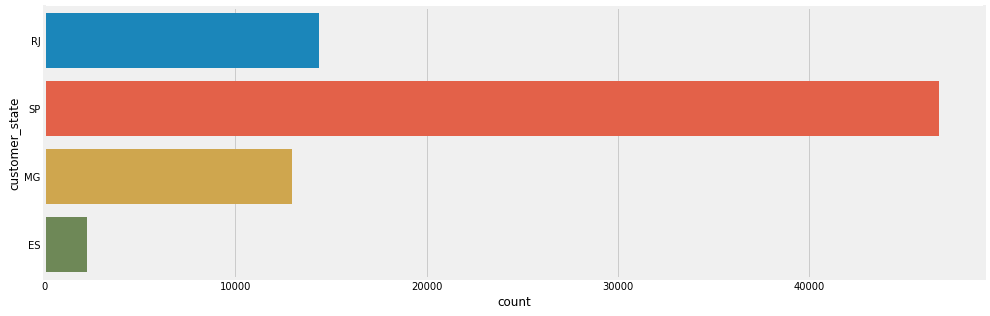

In [0]:
# SUDESTE
print('Contagem de Vendas Sudeste:')
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'customer_state' , data = olist_sudeste)
plt.show()

Verificando as distribuição dos dados no Sudeste:


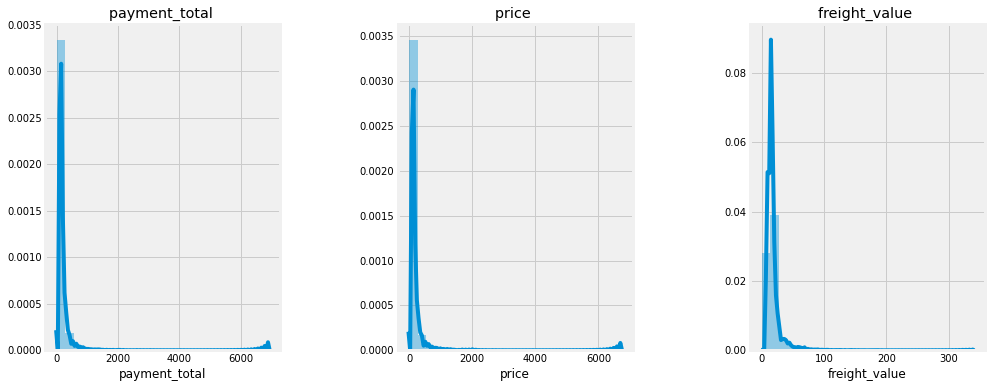

In [0]:
print('Verificando as distribuição dos dados no Sudeste:')
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['payment_total', 'price', 'freight_value']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(olist_sudeste[x] , bins = 25)
    plt.title('{} '.format(x))
plt.show()

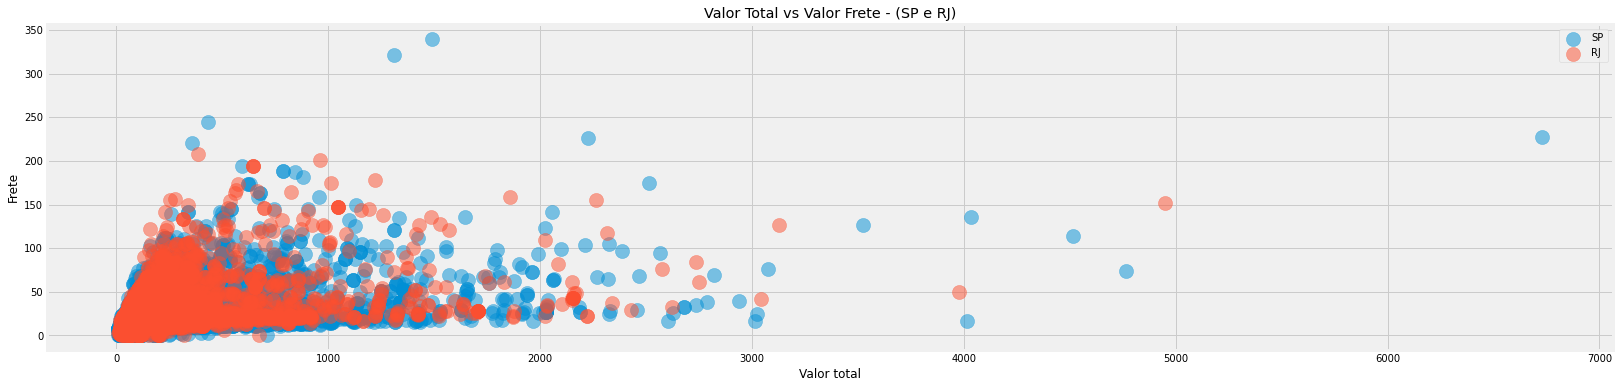

In [0]:
# Valor total pago e o valor do frete para RJ e SP:
plt.figure(1 , figsize = (25 , 6))
for customer_state in ['SP' , 'RJ']:
    plt.scatter(x = 'payment_total',y = 'freight_value' ,
                data = olist_sudeste[olist_sudeste['customer_state'] == customer_state] ,s = 200 , alpha = 0.5 , label = customer_state)
plt.xlabel('Valor total'), plt.ylabel('Frete') 
plt.title('Valor Total vs Valor Frete - (SP e RJ)')
plt.legend()
plt.show()
#freight_value

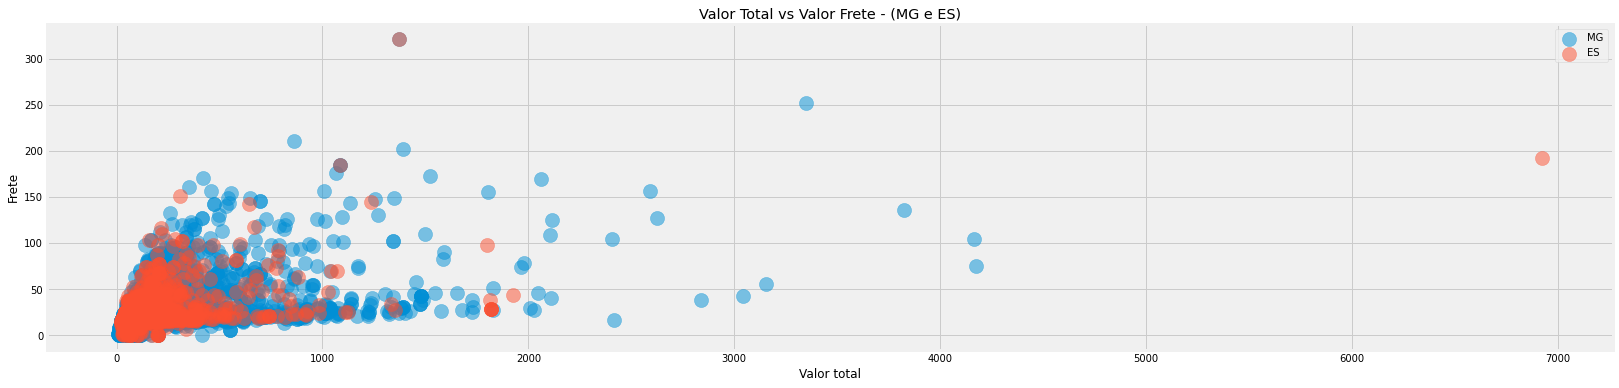

In [0]:
# Valor total pago e o valor do frete MG e ES:
plt.figure(1 , figsize = (25 , 6))
for customer_state in ['MG' , 'ES']:
    plt.scatter(x = 'payment_total',y = 'freight_value' ,
                data = olist_sudeste[olist_sudeste['customer_state'] == customer_state] ,s = 200 , alpha = 0.5 , label = customer_state)
plt.xlabel('Valor total'), plt.ylabel('Frete') 
plt.title('Valor Total vs Valor Frete - (MG e ES)')
plt.legend()
plt.show()
#freight_value

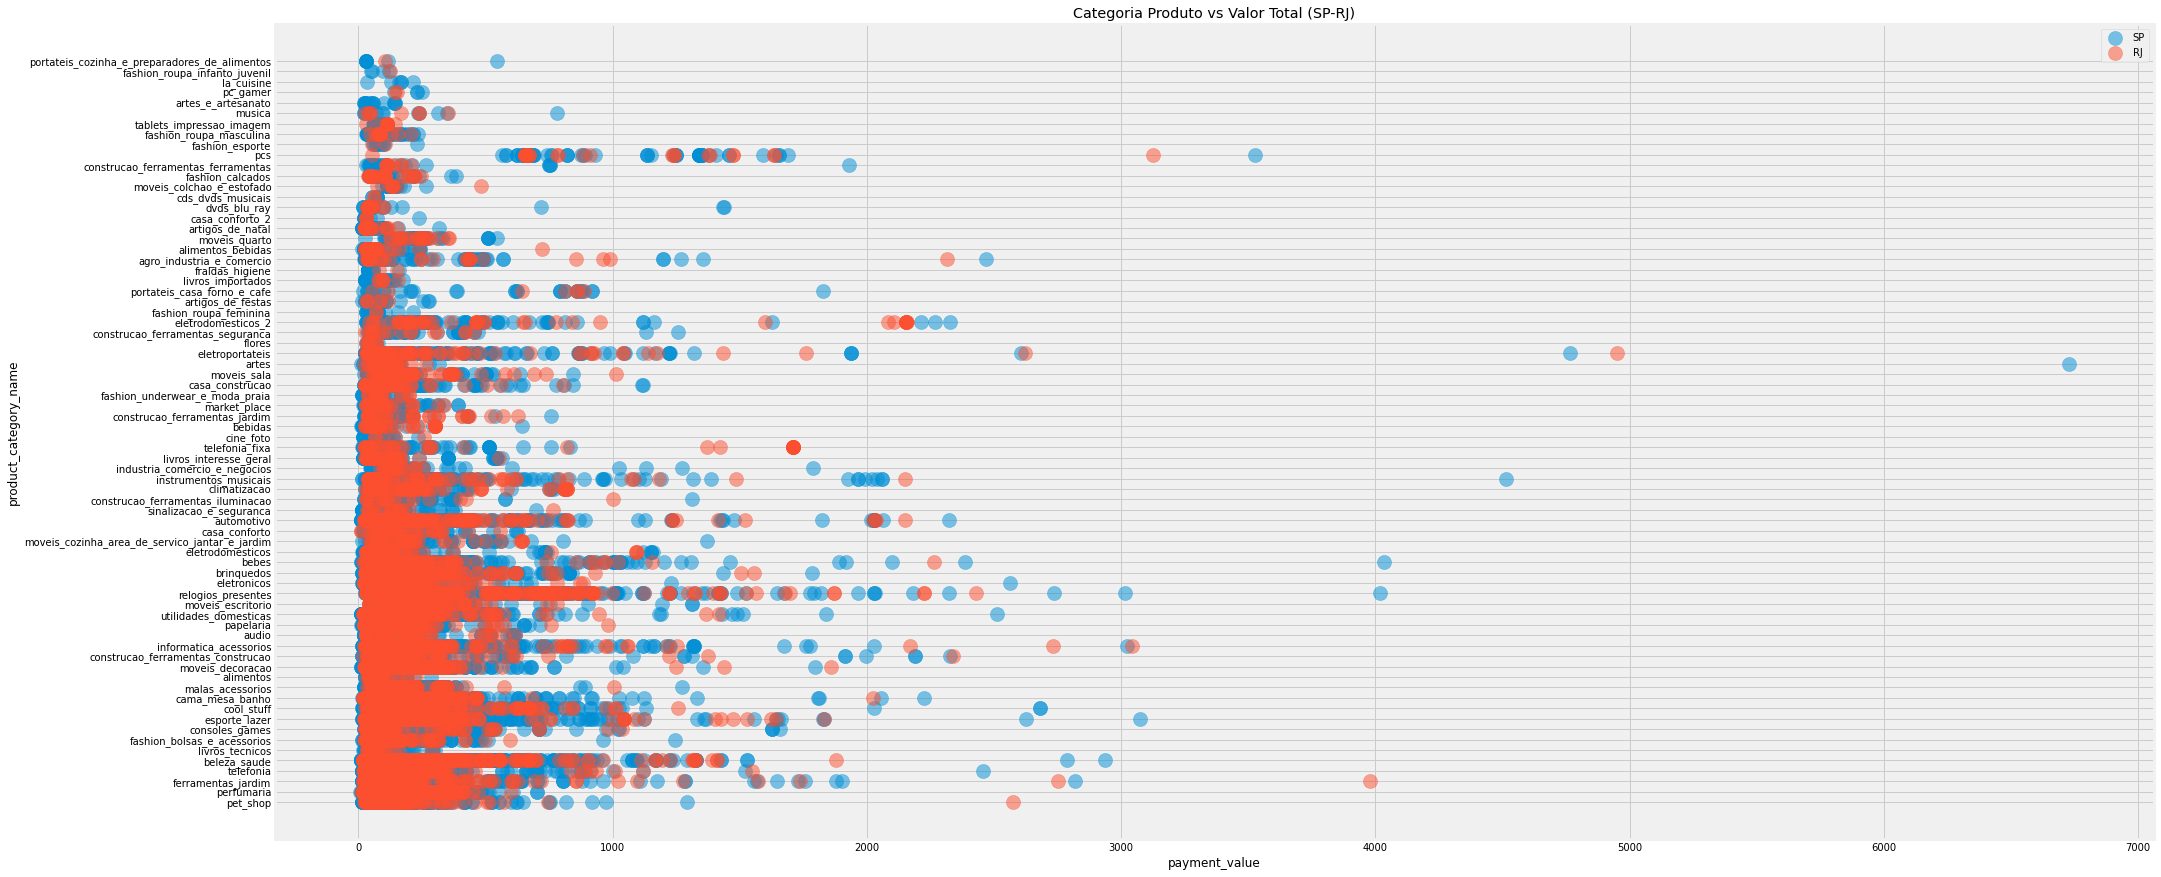

In [0]:
# Categoria Produto e do Valor Pago:
plt.figure(1 , figsize = (30 , 15))
for customer_state in ['SP','RJ']:
    plt.scatter(x = 'payment_total',y = 'product_category_name' ,
                data = olist_sudeste[olist_sudeste['customer_state'] == customer_state] ,s = 200 , alpha = 0.5 , label = customer_state)
plt.xlabel('payment_value'), plt.ylabel('product_category_name') 
plt.title('Categoria Produto vs Valor Total (SP-RJ)')
plt.legend()
plt.show()

_____

### **CLUSTER K-Means S/ GEOLOCATION**  

___

## **Tentativa 1:** 
### Product_category_name -- Payment_total -- Customer_state -- Customer_city

In [0]:
# Selecionandos os atributos necessários
olist_cluster1 = pd.DataFrame(olist_sudeste,columns=['customer_city','product_category_name','payment_total','customer_state'])
olist_cluster1.head()

,customer_city,product_category_name,payment_total,customer_state
0,campos dos goytacazes,cool_stuff,72.19,RJ
1,santa fe do sul,pet_shop,259.83,SP
2,para de minas,moveis_decoracao,216.87,MG
3,atibaia,perfumaria,25.78,SP
4,varzea paulista,ferramentas_jardim,218.04,SP


In [0]:
#transformando features não númericas em features numéricas. 
non_numerical = ['customer_state','customer_city','product_category_name']
le = preprocessing.LabelEncoder()
for x in non_numerical:
    le.fit(olist_cluster1[x])
    olist_cluster1[x] = le.transform(olist_cluster1[x].astype(str))

In [0]:
olist_cluster1.head()

,customer_city,product_category_name,payment_total,customer_state
0,274,26,72.19,2
1,1260,63,259.83,3
2,1005,54,216.87,1
3,114,62,25.78,3
4,1561,40,218.04,3


#### Verificar o número de cluster ideal

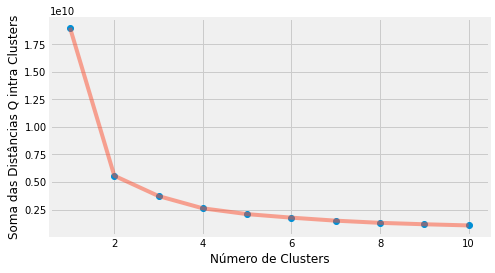

In [0]:
# Selecionando o número de clusters através do método Elbow (Soma das distâncias quadráticas intra clusters):
X_elbow = olist_cluster1[['customer_state','customer_city','payment_total','product_category_name']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X_elbow)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (7 ,4))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

Conforme o número de clusters aumenta a soma das distâncias quadráticas intra clusters diminui, 

quando a diferença entre a distância é quase insignificante temos o valor ótimo de k , no nosso exemplo esse valor seria igual a 3.

#### **Cluster = 3**

In [0]:
# Gerar o Cluster
kmeans1 = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=1234)
kmeans1.fit(olist_cluster1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [0]:
# Os cluster gerados
kmeans1.labels_

array([1, 0, 2, ..., 0, 0, 1], dtype=int32)

In [0]:
# Incluindo os cluster no Dataframe
olist_cluster1["cluster"] = kmeans1.labels_
olist_cluster1.head()

,customer_city,product_category_name,payment_total,customer_state,cluster
0,274,26,72.19,2,1
1,1260,63,259.83,3,0
2,1005,54,216.87,1,2
3,114,62,25.78,3,1
4,1561,40,218.04,3,0


[[1343.88443865   36.43542967  130.02260705    2.53597147]
 [ 233.1267303    36.19101195  136.09697301    2.04171671]
 [ 782.01478743   36.43277085  135.0254159     2.31393477]]


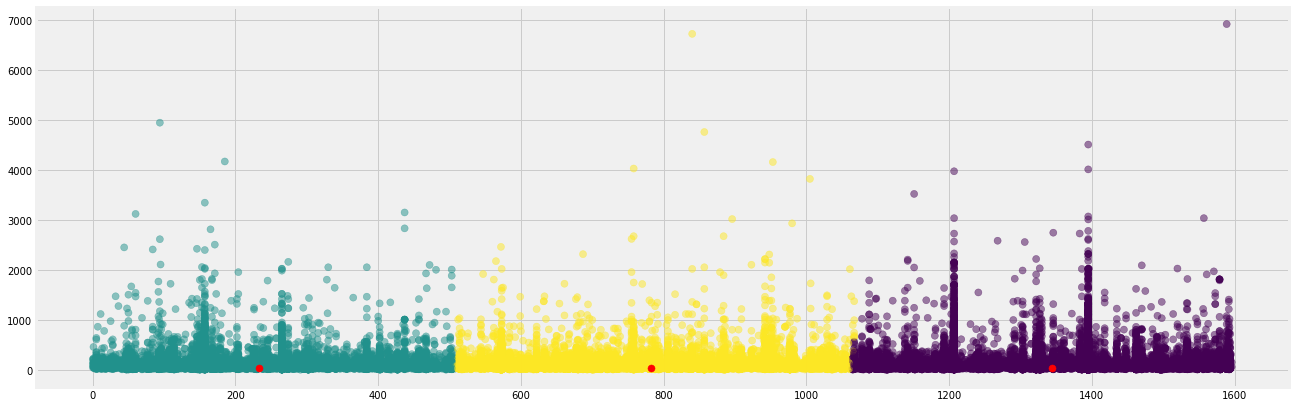

In [0]:
# Gráfico Clusters
centroids1 = kmeans1.cluster_centers_
print(centroids1)

plt.figure(figsize=(20,7))
plt.scatter(olist_cluster1['customer_city'], olist_cluster1['payment_total'], c= kmeans1.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids1[:, 0], centroids1[:, 1], c='red', s=50)
plt.show()

Text(0.5, 1.0, 'Gastos por cluster')

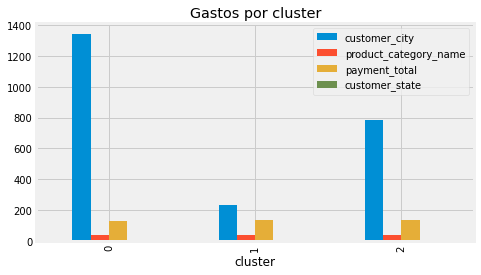

In [0]:
# Gráfico
olist_cluster1.groupby("cluster").aggregate("mean").plot.bar(figsize=(7,4))
plt.title("Gastos por cluster")

In [0]:
import plotly.express as px
fig = px.scatter_3d(olist_cluster1, x='product_category_name', y ='payment_total', z = 'customer_state', color ='product_category_name')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
import plotly.express as px

fig = px.scatter(olist_cluster1, x='product_category_name', y ='payment_total')
fig.show()

____

## **Tentativa 2:** 
### Product_category_name -- Payment_total

In [0]:
# Selecionandos os atributos necessários
olist_cluster2 = pd.DataFrame(olist_sudeste,columns=['product_category_name','payment_total'])
olist_cluster2.head()

,product_category_name,payment_total
0,cool_stuff,72.19
1,pet_shop,259.83
2,moveis_decoracao,216.87
3,perfumaria,25.78
4,ferramentas_jardim,218.04


In [0]:
#transformando features não númericas em features numéricas. 
non_numerical = ['product_category_name']
le = preprocessing.LabelEncoder()
for x in non_numerical:
    le.fit(olist_cluster2[x])
    olist_cluster2[x] = le.transform(olist_cluster2[x].astype(str))

In [0]:
olist_cluster2.head()

,product_category_name,payment_total
0,26,72.19
1,63,259.83
2,54,216.87
3,62,25.78
4,40,218.04


#### Verificar o número de cluster ideal

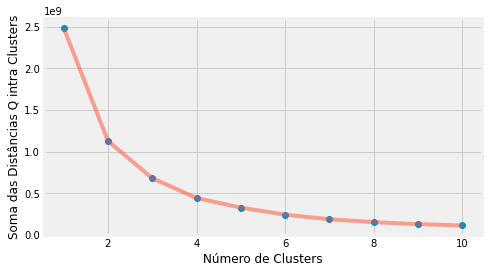

In [0]:
# Selecionando o número de clusters através do método Elbow (Soma das distâncias quadráticas intra clusters):
X_elbow = olist_cluster2[['product_category_name','payment_total']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X_elbow)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (7 ,4))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

Conforme o número de clusters aumenta a soma das distâncias quadráticas intra clusters diminui, 

quando a diferença entre a distância é quase insignificante temos o valor ótimo de k , no nosso exemplo esse valor seria igual a 3.

#### **Cluster = 3**

In [0]:
# Gerar o Cluster
kmeans2 = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=1234)
kmeans2.fit(olist_cluster2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [0]:
# Os cluster gerados
kmeans2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
# Incluindo os cluster no Dataframe
olist_cluster2["cluster"] = kmeans2.labels_
olist_cluster2.head()

,product_category_name,payment_total,cluster
0,26,72.19,0
1,63,259.83,0
2,54,216.87,0
3,62,25.78,0
4,40,218.04,0


Text(0.5, 1.0, 'Gastos por cluster')

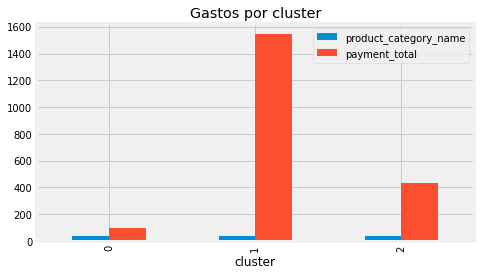

In [0]:
# Gráfico
olist_cluster2.groupby("cluster").aggregate("mean").plot.bar(figsize=(7,4))
plt.title("Gastos por cluster")

[[  36.30926963   94.901737  ]
 [  37.47098976 1546.10358362]
 [  37.15431063  432.12951023]]


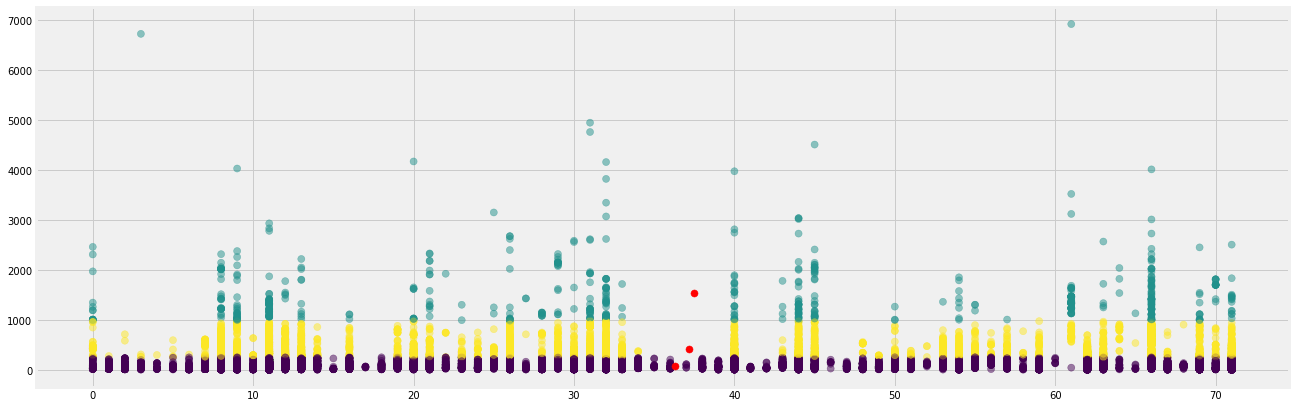

In [0]:
# Gráfico do cluster
centroids2 = kmeans2.cluster_centers_
print(centroids2)

plt.figure(figsize=(20,7))
plt.scatter(olist_cluster2['product_category_name'], olist_cluster2['payment_total'], c= kmeans2.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids2[:, 0], centroids2[:, 1], c='red', s=50)
plt.show()

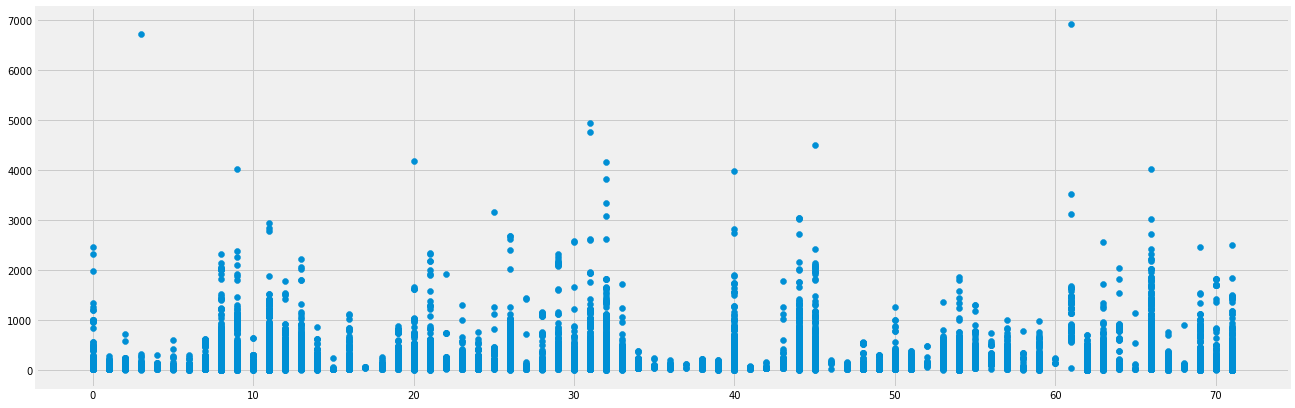

In [0]:
# Sem o Cluster
fig, ax = plt.subplots(figsize=(20,7))
ax.scatter(olist_cluster2['product_category_name'], olist_cluster2['payment_total'])
plt.show()

___

### **CLUSTER K-Means COM GEOLOCATION**  

____

## **Tentativa:** 
### Product_category_name -- Payment_total -- Geolocation_lat -- Geolocation_lng

In [0]:
# Selecionandos os atributos necessários 
olist_cluster_geo = pd.DataFrame(olist_sudeste_geocod,columns=['product_category_name','payment_total','geolocation_lat','geolocation_lng'])
olist_cluster_geo.head()

,product_category_name,payment_total,geolocation_lat,geolocation_lng
0,cool_stuff,72.19,-21.758076,-41.312633
1,beleza_saude,164.98,-21.758076,-41.312633
2,eletronicos,36.69,-21.758076,-41.312633
3,malas_acessorios,146.17,-21.758076,-41.312633
4,beleza_saude,48.13,-21.758076,-41.312633


In [0]:
#transformando features não númericas em features numéricas. 
non_numerical = ['product_category_name']
le = preprocessing.LabelEncoder()
for x in non_numerical:
    le.fit(olist_cluster_geo[x])
    olist_cluster_geo[x] = le.transform(olist_cluster_geo[x].astype(str))

In [0]:
olist_cluster_geo.head()

,product_category_name,payment_total,geolocation_lat,geolocation_lng
0,26,72.19,-21.758076,-41.312633
1,11,164.98,-21.758076,-41.312633
2,30,36.69,-21.758076,-41.312633
3,50,146.17,-21.758076,-41.312633
4,11,48.13,-21.758076,-41.312633


In [0]:
# Colocando lat e lng Positivo
olist_cluster_geo['geolocation_lat']*= -1
olist_cluster_geo['geolocation_lng']*= -1

In [0]:
olist_cluster_geo.head()

,product_category_name,payment_total,geolocation_lat,geolocation_lng
0,26,72.19,21.758076,41.312633
1,11,164.98,21.758076,41.312633
2,30,36.69,21.758076,41.312633
3,50,146.17,21.758076,41.312633
4,11,48.13,21.758076,41.312633


#### Verificando o número ideal de cluster

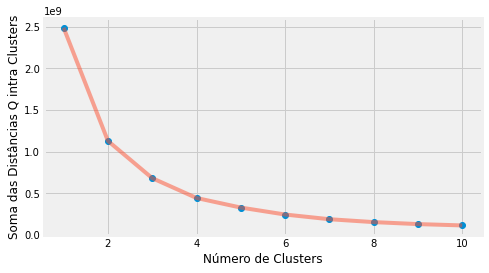

In [0]:
# Selecionando o número de clusters através do método Elbow (Soma das distâncias quadráticas intra clusters):
X_elbow = olist_cluster_geo[['product_category_name','payment_total','geolocation_lat','geolocation_lng']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X_elbow)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (7 ,4))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

Conforme o número de clusters aumenta a soma das distâncias quadráticas intra clusters diminui, 

quando a diferença entre a distância é quase insignificante temos o valor ótimo de k , no nosso exemplo esse valor seria igual a 3.

#### Cluster = 3

In [0]:
# Gerar o Cluster
kmeans_geo = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=1234)
kmeans_geo.fit(olist_cluster_geo)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [0]:
kmeans_geo.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
# Incluindo os cluster no Dataframe
olist_cluster_geo["cluster"] = kmeans_geo.labels_
olist_cluster_geo.head()

,product_category_name,payment_total,geolocation_lat,geolocation_lng,cluster
0,26,72.19,21.758076,41.312633,0
1,11,164.98,21.758076,41.312633,0
2,30,36.69,21.758076,41.312633,0
3,50,146.17,21.758076,41.312633,0
4,11,48.13,21.758076,41.312633,0


Text(0.5, 1.0, 'Gastos por cluster')

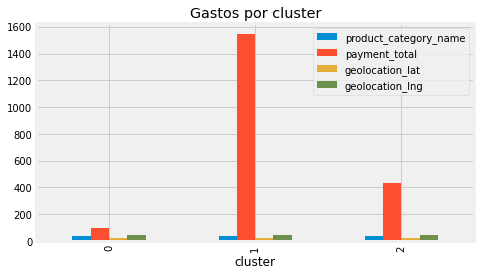

In [0]:
# Gráfico
olist_cluster_geo.groupby("cluster").aggregate("mean").plot.bar(figsize=(7,4))
plt.title("Gastos por cluster")

[[  36.31311292   94.90250387   22.46091276   45.69558061]
 [  37.47098976 1546.10358362   22.30635895   45.43805782]
 [  37.15228341  432.19688214   22.35535616   45.58248561]]


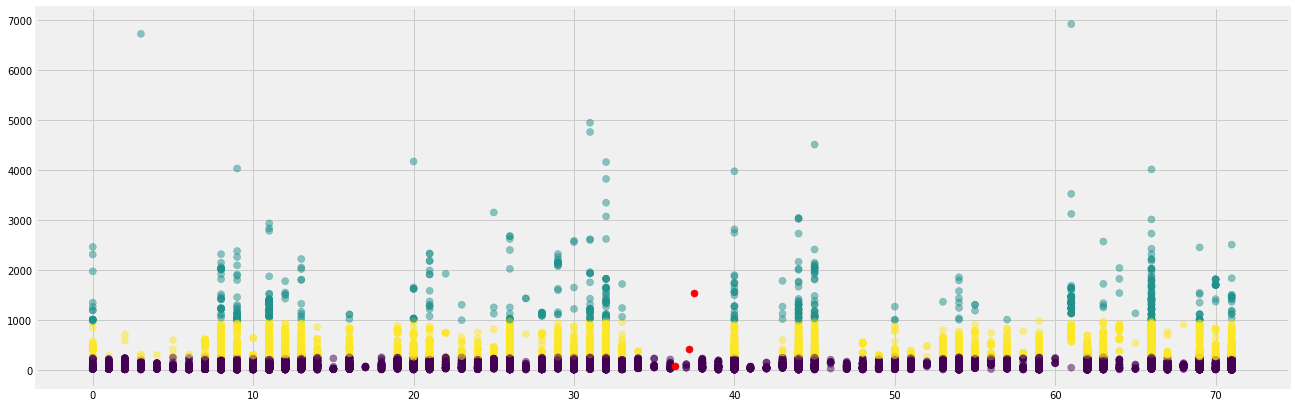

In [0]:
# Gráfico do cluster
centroids_geo = kmeans_geo.cluster_centers_
print(centroids_geo)

plt.figure(figsize=(20,7))
plt.scatter(olist_cluster_geo['product_category_name'], olist_cluster_geo['payment_total'], c= kmeans_geo.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids_geo[:, 0], centroids_geo[:, 1], c='red', s=50)
plt.show()

____

### Cluster por K-Vizinhos (KNN)

#### Selecionando apenas as colunas que serão usadas para gerar o **cluster**

In [0]:
olist_cluster_k = pd.DataFrame(olist_sudeste,columns=['product_category_name','payment_total'])

#### O classificador KNN prevê a classe de uma determinada observação de teste identificando as observações que estão mais próximas a escala da variável realmente importa. 

In [0]:
#transformando features não númericas em features numéricas. 
non_numerical = ['product_category_name']
le = preprocessing.LabelEncoder()
for x in non_numerical:
    le.fit(olist_cluster_k[x])
    olist_cluster_k[x] = le.transform(olist_cluster_k[x].astype(str))

In [0]:
olist_cluster_k.head()

,product_category_name,payment_total
0,26,72.19
1,63,259.83
2,54,216.87
3,62,25.78
4,40,218.04


#### **Padronizando os dados na mesma escala**
#### Todas as variáveis que estão em grande escala terão muito mais efeito sobre as distâncias entre as observações.

In [0]:
scaler_k = StandardScaler()
scaler_k.fit(olist_cluster_k)

StandardScaler(copy=True, with_mean=True, with_std=True)

#### Usa o objeto escalar para fazer a transformação.
#### O transform irá padronizar centrando e dimensionando para que se tenha um objeto ajustado

In [0]:
scaled_features_k = scaler_k.transform(olist_cluster_k)

#### Agora temos uma matriz de valores e esta é a versão em escala dos dados

In [0]:
scaled_features_k

array([[-0.47239472, -0.33588049],
       [ 1.21079942,  0.71120187],
       [ 0.80137382,  0.47147336],
       ...,
       [-0.19944432, -0.08666551],
       [ 0.34645649, -0.37762093],
       [-1.06378726, -0.42739696]])

#### Coloca os dados padronizados no dataframe

In [0]:
olist_cluster_feat_k = pd.DataFrame(scaled_features_k, columns = olist_cluster_k.columns[0:])

In [0]:
olist_cluster_feat_k.head()

,product_category_name,payment_total
0,-0.472395,-0.335880
1,1.210799,0.711202
2,0.801374,0.471473
3,1.165308,-0.594861
4,0.164490,0.478002


#### Validação Cruzada (Cross-Validation)
#### Modelo para prever se alguém estará dentro dessa classe-alvo ou não.

In [0]:
X = olist_cluster_feat_k #instancias, os dados padronizados
y = olist_cluster_k['product_category_name'] # Classes é a coluna alvo.

X_treino, X_teste, y_treino,y_teste = train_test_split(X,y, test_size = 0.3, random_state =1234) # Teste 30% e Treino 70%

#### Classificação K-Vizinhos

In [0]:
knn = KNeighborsClassifier(n_neighbors=1) # Para 01 cluster

In [0]:
# Treinando o modelo
knn.fit(X_treino,y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
# Predição
pred = knn.predict(X_teste)

In [0]:
pred

array([ 8, 12,  8, ..., 44,  1, 11])

#### Validar o modelo -- Matriz confusão

In [0]:
print(confusion_matrix(y_teste,pred))
print(classification_report(y_teste,pred))

[[  44    2    0 ...    0    0    0]
 [   0  122    0 ...    0    0    0]
 [   0    1   63 ...    0    0    0]
 ...
 [   0    0    0 ...  802    0    3]
 [   0    0    0 ...    3   48    2]
 [   0    0    0 ...    0    3 1518]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.98      1.00      0.99       122
           2       0.98      0.97      0.98        65
           3       0.96      0.96      0.96        49
           4       0.88      1.00      0.93         7
           5       1.00      0.83      0.91        12
           6       0.92      0.96      0.94        23
           7       0.99      0.99      0.99        78
           8       0.99      1.00      0.99       850
           9       0.99      0.99      0.99       629
          10       1.00      0.96      0.98        84
          11       1.00      1.00      1.00      1939
          12       0.99      1.00      0.99       925
          13   

#### Validando a Quantidade de cluster ideal

#### Criando a taxa de erro

In [0]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
error_rate = [] # Taxa de erro

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_treino, y_treino)
    pred_i = knn.predict(X_teste)
    error_rate.append(np.mean(pred_i != y_teste)) # taxa de erro que é a média de quando a previsão não era igual aos valores reais do teste


Text(0, 0.5, 'Error Rate')

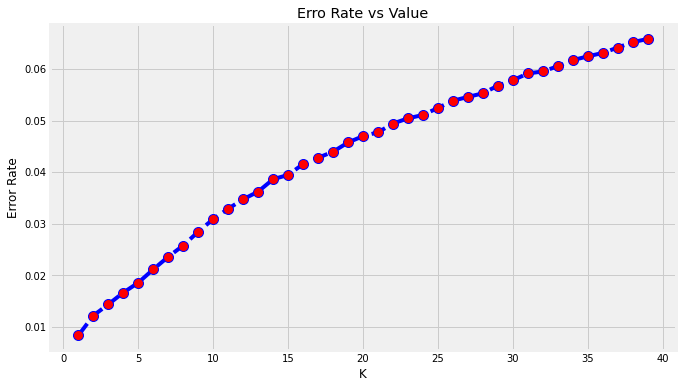

In [0]:
plt.figure(figsize =(10,6))
plt.plot(range(1,40),error_rate, color = 'blue', linestyle = 'dashed', marker='o', markerfacecolor = 'red', markersize=10)
plt.title('Erro Rate vs Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##### Com K= 1 o erro foi de 1%  e depois os erros vão aumentando conforme aumenta o valor de K

#### K- Vizinho = 3

____

In [0]:
X1 = olist_cluster_feat_k.to_numpy() #instancias, os dados padronizados
y1 = olist_cluster_k['product_category_name']  # Classes é a coluna alvo.
knn = KNeighborsClassifier(n_neighbors=3)# Para 03 cluster
knn.fit(X1,y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
# Prevendo as categorias dos produtos
prediction = knn.predict(X1)
prediction

array([26, 63, 54, ..., 32, 44, 13])

# Comparando vizinhos mais próximos com e sem análise de componentes de vizinhança

Automatically created module for IPython interactive environment


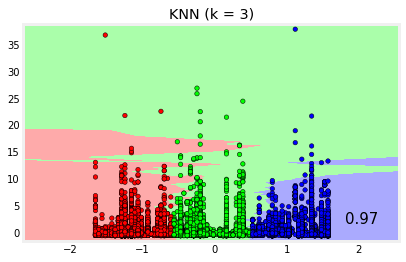

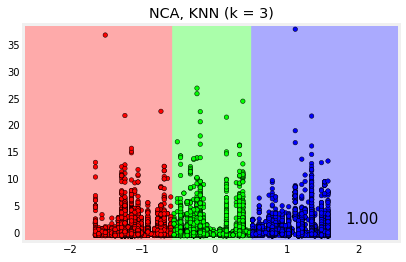

In [0]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import Pipeline


print(__doc__)

n_neighbors = 3

X = olist_cluster_feat_k.to_numpy() #instancias, os dados padronizados
y = olist_cluster_k['product_category_name']  # Classes é a coluna alvo.

#dataset = datasets.load_iris()
#X, y = dataset.data, dataset.target

# we only take two features. We could avoid this ugly
# slicing by using a two-dim dataset
#X = X[:, [0, 2]]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

h = .01  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

names = ['KNN', 'NCA, KNN']

classifiers = [Pipeline([('scaler', StandardScaler()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
                         ]),
               Pipeline([('scaler', StandardScaler()),
                         ('nca', NeighborhoodComponentsAnalysis()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
                         ])
               ]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8)

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(0.9, 0.1, '{:.2f}'.format(score), size=15,
             ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

# Classificação de vizinhos mais próximos 

#### Ele traçará os limites de decisão para cada classe.

Automatically created module for IPython interactive environment


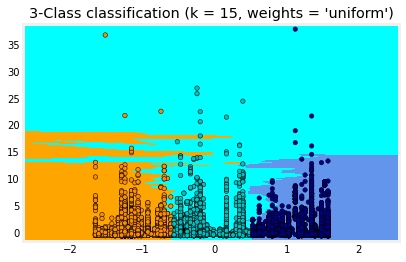

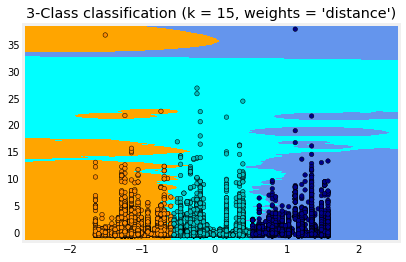

In [0]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

X = olist_cluster_feat_k.to_numpy() #instancias, os dados padronizados
y = olist_cluster_k['product_category_name']  # Classes é a coluna alvo.

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

_____